# Machine Learning Notebook II

Georgetown University School for Continuing Studies 
Georgetown Data Analytics
Capstone 10: Agronomics


In [71]:
import pandas as pd
import csv
import numpy as np
from sklearn.svm import SVC
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from scipy import optimize
import math
import pandas.plotting
from sklearn.model_selection import train_test_split
from pandas.plotting import radviz
from sklearn import tree
from sklearn import svm
from scipy.stats import sem
from sklearn import cross_validation as cv
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer  
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.cross_validation import KFold
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
#from yellowbrick.regressor import PredictionError

import warnings
warnings.filterwarnings('ignore')

# Model 
Note: Review previous notebooks ( "Data Ingestion" and "Data Wrangling") to execute the following code

Dataframes were created in these notebooks 

In [72]:
# "5-Merge.csv " from Data Ingestion and Data Wrangling Notebooks
dataset = pd.read_csv('5-MERGE.csv',dtype={'Year':int,'Harvested':int,'Production':int,'Price':float})

In [73]:
print(dataset.County.value_counts())


Fresno    36
Kern      36
Name: County, dtype: int64


In [74]:
print(dataset.County_Code.value_counts())


29    36
19    36
Name: County_Code, dtype: int64


In [75]:
print(dataset.Commodity_Code.value_counts())

261999    72
Name: Commodity_Code, dtype: int64


In [76]:
print(dataset.dtypes)



Year                           int32
Commodity_Code                 int64
County_Code                    int64
County                        object
Harvested                      int32
Yield                        float64
Production                     int32
Price                        float64
Value                          int64
Grow_total_p                 float64
Grow_avg_t                   float64
January_p                    float64
February_p                   float64
March_p                      float64
April_p                      float64
May_p                        float64
June_p                       float64
July_p                       float64
August_p                     float64
September_p                  float64
October_p                    float64
November_p                   float64
December_p                   float64
Total_p                      float64
January_t                    float64
February_t                   float64
March_t                      float64
A

In [77]:
print(dataset.columns)

Index(['Year', 'Commodity_Code', 'County_Code', 'County', 'Harvested', 'Yield',
       'Production', 'Price', 'Value', 'Grow_total_p', 'Grow_avg_t',
       'January_p', 'February_p', 'March_p', 'April_p', 'May_p', 'June_p',
       'July_p', 'August_p', 'September_p', 'October_p', 'November_p',
       'December_p', 'Total_p', 'January_t', 'February_t', 'March_t',
       'April_t', 'May_t', 'June_t', 'July_t', 'August_t', 'September_t',
       'October_t', 'November_t', 'December_t', 'Annual_t',
       'Percapita_Personal_Income', 'Personal_Income', 'Resident_Population',
       'House_Price_Index'],
      dtype='object')


In [78]:
print(dataset.shape)

(72, 41)


In [79]:
from sklearn import preprocessing
le_county = preprocessing.LabelEncoder()

#to convert into numbers
dataset.County = le_county.fit_transform(dataset.County)


In [80]:
print(dataset.describe())



              Year  Commodity_Code  County_Code     County      Harvested  \
count    72.000000            72.0    72.000000  72.000000      72.000000   
mean   1997.500000        261999.0    24.000000   0.500000   82850.236111   
std      10.461196             0.0     5.035088   0.503509   45865.125607   
min    1980.000000        261999.0    19.000000   0.000000   23642.000000   
25%    1988.750000        261999.0    19.000000   0.000000   46608.250000   
50%    1997.500000        261999.0    24.000000   0.500000   72765.000000   
75%    2006.250000        261999.0    29.000000   1.000000  104925.000000   
max    2015.000000        261999.0    29.000000   1.000000  210000.000000   

           Yield     Production        Price         Value  Grow_total_p  \
count  72.000000      72.000000    72.000000  7.200000e+01     72.000000   
mean    0.916528   82542.250000  3198.235417  3.122575e+08      4.256902   
std     0.241650   59607.525496  1445.119636  3.457742e+08      2.594069   
mi

In [81]:
print(dataset.head())


   Year  Commodity_Code  County_Code  County  Harvested  Yield  Production  \
0  1980          261999           19       0      23992   0.59       14200   
1  1981          261999           19       0      23820   0.75       17900   
2  1982          261999           19       0      23642   0.69       16300   
3  1983          261999           19       0      24301   0.48       11700   
4  1984          261999           19       0      26300   0.94       24700   

    Price     Value  Grow_total_p        ...          August_t  September_t  \
0  3000.0  42600000      5.784078        ...              80.7         75.6   
1  1500.0  26850000      4.894078        ...              82.9         76.5   
2  1800.0  29340000      6.540000        ...              80.4         72.3   
3  2300.0  26910000     11.000000        ...              82.1         78.8   
4  1800.0  44460000      2.000000        ...              83.5         81.0   

   October_t  November_t  December_t  Annual_t  Percapit

In [82]:
print(dataset.tail())

    Year  Commodity_Code  County_Code  County  Harvested  Yield  Production  \
67  2011          261999           29       1     147000   1.28      188000   
68  2012          261999           29       1     144000   1.13      163000   
69  2013          261999           29       1     147000   1.14      168000   
70  2014          261999           29       1     199000   1.01      201000   
71  2015          261999           29       1     210000   0.94      197000   

      Price       Value  Grow_total_p        ...          August_t  \
67  3673.46   690610000       2.68000        ...              83.0   
68  4768.75   777306000       3.18000        ...              87.0   
69  5492.10   922672000       1.53000        ...              82.7   
70  7124.87  1432099000       1.22000        ...              85.0   
71  7379.97  1453855000       1.93187        ...              84.0   

    September_t  October_t  November_t  December_t  Annual_t  \
67         80.3       67.1        53.3  

# Define Feature and Target 
## Machine Learning 

In [83]:
#Indicators for Prediction
features = ['Year','Harvested','Value','Grow_total_p','Grow_avg_t','Price','Percapita_Personal_Income','House_Price_Index']

#What we want to Predict 
target = 'Yield'

In [84]:
# Defines indicators and prediction value(s)
X = (dataset[features])
y = (dataset[target])

In [85]:
# L2 and L1 Regularization 
alphas = np.logspace(-10, 0, 200)

In [86]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [87]:
#X=preprocessing.normalize(X)

# Create training and test splits 
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.2,random_state=0)

# 20% of the data is used for testing (meaning of test_size = 0.2)

# Regression Models 
1. Linear regression 
2. ElasticNet 
3. Lasso CV
4. Pipeline 
5. Random Forest 
6. AdaBoost
7. Bayesian Ridge

Install yellowbrick for visualizations

## Linear Regression

In [88]:
from sklearn import cross_validation

clf = LinearRegression() 
scores = cross_validation.cross_val_score(
clf, X_train, y_train, cv=5)
print(scores) 
print ("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))



[ 0.41728178  0.63849634  0.65190408  0.69790557  0.83285099]
Accuracy: 0.65 (+/- 0.07)


In [89]:
model = LinearRegression() 
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))


print(yhat[0:5], model, target)
prediction = pd.DataFrame(yhat[0:5], columns=['LinearRegression']).to_csv('prediction.csv')

r2=0.768 MSE=0.019
[ 1.00451333  1.12257703  0.75078561  1.17214649  1.08577285] LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) Yield


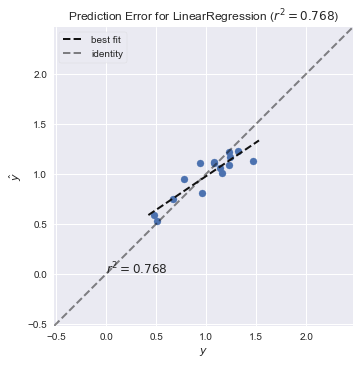

In [90]:
# Install Yellowbrick

from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(LinearRegression())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

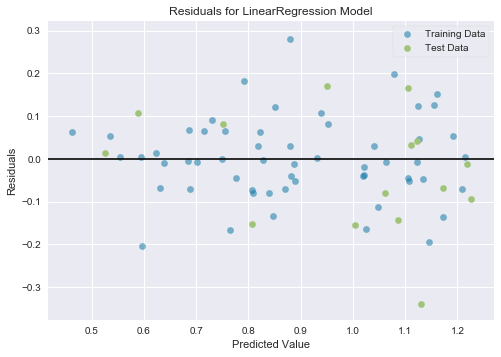

In [91]:
from yellowbrick.regressor import ResidualsPlot
model = ResidualsPlot(LinearRegression())
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.poof()

## Ellastic Net

In [92]:
# takes model and fits to training data (20%)
model = ElasticNetCV(alphas=alphas) 
model.fit(X_train, y_train)

#Y target (prediction) based on the above
yhat = model.predict(X_test)

# R2 coefficient
r2 = r2_score(y_test, yhat)

#Mean Square Error 
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me)) # .3f formates decimal places

print(yhat, model, target)
prediction = pd.DataFrame(yhat, columns=['ElasticNetCV']).to_csv('prediction.csv')

r2=0.759 MSE=0.019
[ 1.00122928  1.12486573  0.75497974  1.16660373  1.08689344  0.60205807
  0.80199744  1.05720795  1.10453731  1.10114915  0.95004445  1.22364761
  1.12559534  0.54258118  1.20955428] ElasticNetCV(alphas=array([  1.00000e-10,   1.12267e-10, ...,   8.90735e-01,   1.00000e+00]),
       copy_X=True, cv=None, eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0) Yield


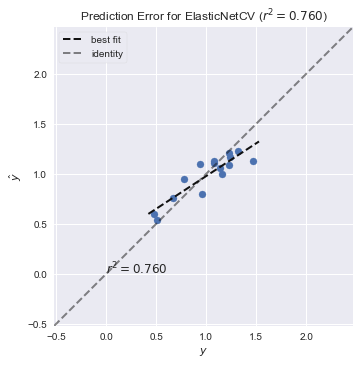

In [93]:
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(ElasticNetCV())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

## LassoCV

In [94]:
model = LassoCV(alphas=alphas) 
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))


r2=0.759 MSE=0.019


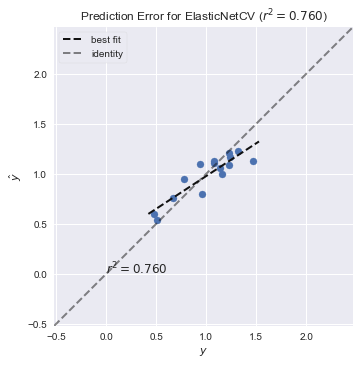

In [95]:
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(ElasticNetCV())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

## Pipeline

In [96]:
model = Pipeline([
    ('poly', PolynomialFeatures(2)), 
    ('lasso', LassoCV(alphas=alphas)),
])
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.named_steps['lasso'].alpha_))

r2=0.926 MSE=0.006 alpha=0.000


In [97]:
model = Pipeline([
    ('poly', PolynomialFeatures(2)), 
    ('Elastic', ElasticNetCV
(alphas=alphas)),
])
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.named_steps['Elastic'].alpha_))

r2=0.933 MSE=0.005 alpha=0.001


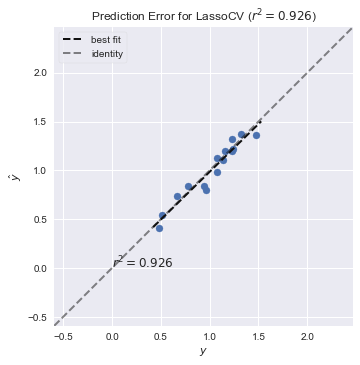

In [98]:
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(Pipeline([
    ('poly', PolynomialFeatures(2)), 
    ('lasso', LassoCV(alphas=alphas)),
]))
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

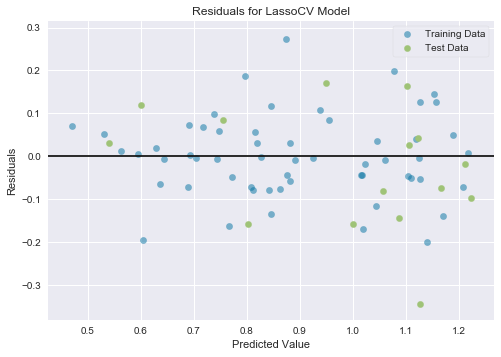

In [99]:
from yellowbrick.regressor import ResidualsPlot
model = ResidualsPlot(LassoCV())
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.poof()

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 5, random_state = 0) 
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.715 MSE=0.023


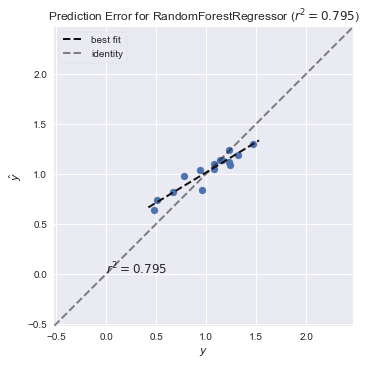

In [101]:
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(RandomForestRegressor())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

In [102]:
from sklearn import tree
from IPython.core.display import Image
from pandas.compat import StringIO

import pydotplus
# Visualize tree
dot_data = StringIO()
tree.export_graphviz(model.estimators_[0], out_file=dot_data)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
image = graph.write("random_network")

ModuleNotFoundError: No module named 'pydotplus'

## AdaBoost  

In [103]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor() 
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.749 MSE=0.020


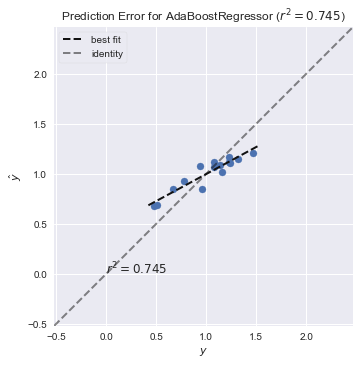

In [104]:
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(AdaBoostRegressor())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

## BayesianRidge

In [105]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge() 
model.fit(X_train, y_train)
yhat = model.predict(X_test) #predicted
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.724 MSE=0.022


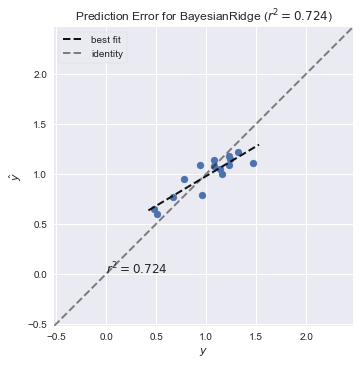

In [106]:
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(BayesianRidge())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

In [107]:
model = svm.SVR()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))


r2=0.658 MSE=0.028


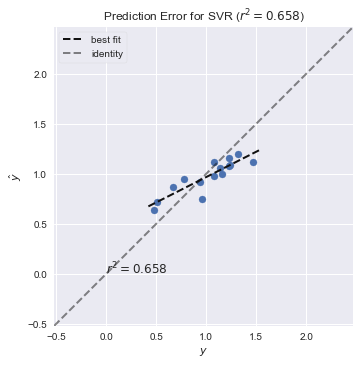

In [108]:
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(svm.SVR())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

In [109]:
from sklearn import linear_model
model = linear_model.Lasso (alpha=0.2)
model.fit(X_train, y_train)
yhat = model.predict(X_test) #predicted
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=-0.209 MSE=0.098


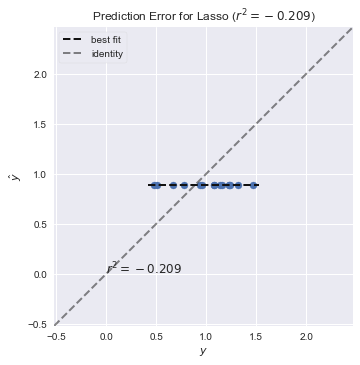

In [110]:
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(Lasso())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

## NuSVR

In [111]:
model = svm.NuSVR()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.820 MSE=0.015


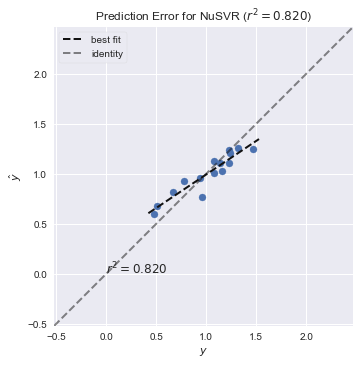

In [112]:
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(svm.NuSVR())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

In [113]:
model = svm.LinearSVR()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

r2=0.662 MSE=0.027


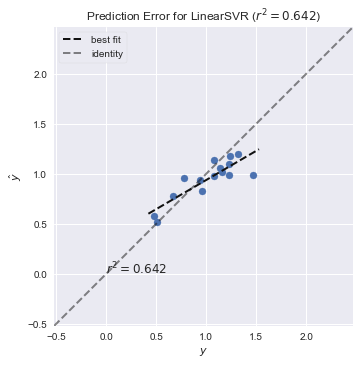

In [114]:
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(svm.LinearSVR())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

## K Neighbors Regression 

In [115]:
from sklearn.neighbors import KNeighborsRegressor
model= KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

print(yhat, model, target)
prediction = pd.DataFrame(yhat, columns=['predictions']).to_csv('prediction.csv')

r2=0.680 MSE=0.026
[ 1.04   1.105  0.93   1.01   1.295  0.68   0.74   1.01   1.005  1.005
  0.965  1.185  1.295  0.665  1.07 ] KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform') Yield


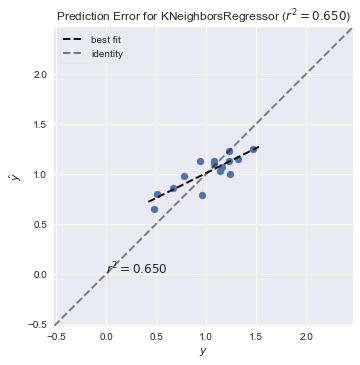

In [116]:
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(KNeighborsRegressor())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

In [117]:
model = Ridge()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

print(yhat, model, target)
prediction = pd.DataFrame(yhat, columns=['predictions']).to_csv('prediction.csv')

r2=0.725 MSE=0.022
[ 0.99641055  1.13326068  0.76521913  1.14962078  1.09002606  0.64501346
  0.78423313  1.04981084  1.08130671  1.08774306  0.95139492  1.21734987
  1.10954515  0.59405646  1.18245498] Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) Yield


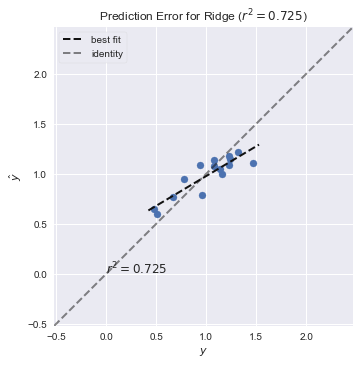

In [118]:
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(Ridge())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()

## More Visualizations

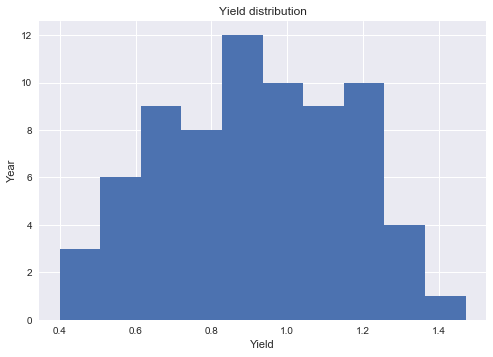

In [119]:
# Create a histogram to examine age distribution of the passengers.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(dataset['Yield'], bins = 10, range = (dataset['Yield'].min(),dataset['Yield'].max()))
plt.title('Yield distribution')
plt.xlabel('Yield')
plt.ylabel('Year')
plt.show()

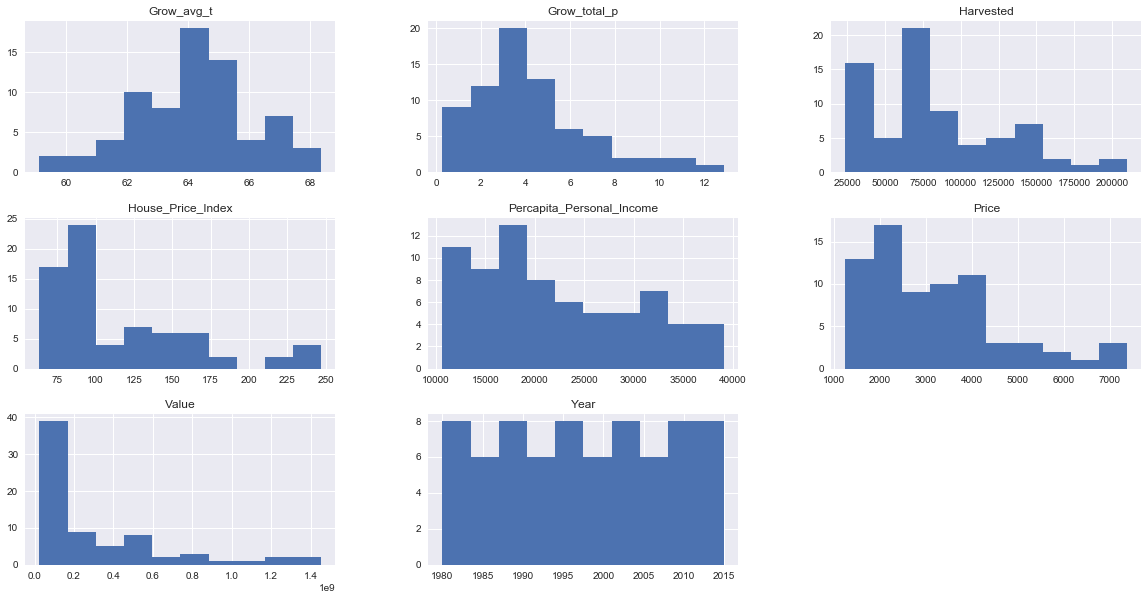

In [120]:
dataset[features].hist(figsize=(20,10))
plt.show()

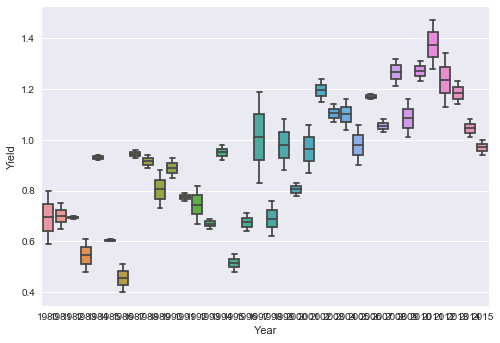

In [121]:
g1 = sns.boxplot(y='Yield', x='Year', data=dataset)
plt.show()

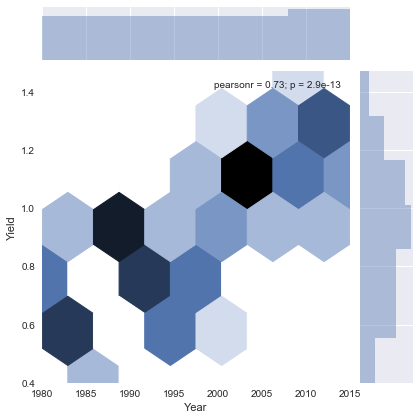

In [122]:
g = sns.jointplot("Year", "Yield",kind='hex',data= dataset)
plt.show()

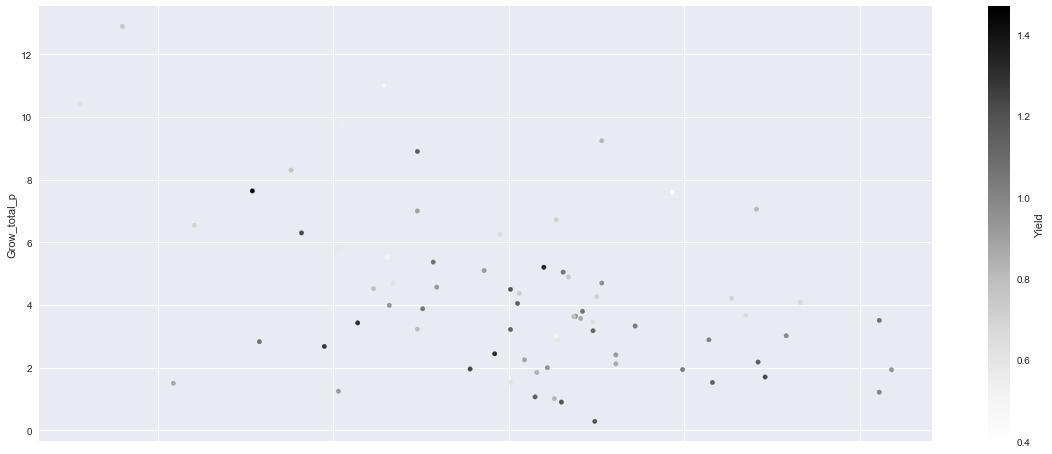

In [123]:
dataset.plot(kind='scatter', x='Grow_avg_t', y='Grow_total_p', c='Yield',figsize=[20,8])
plt.style.use('ggplot')
plt.show()

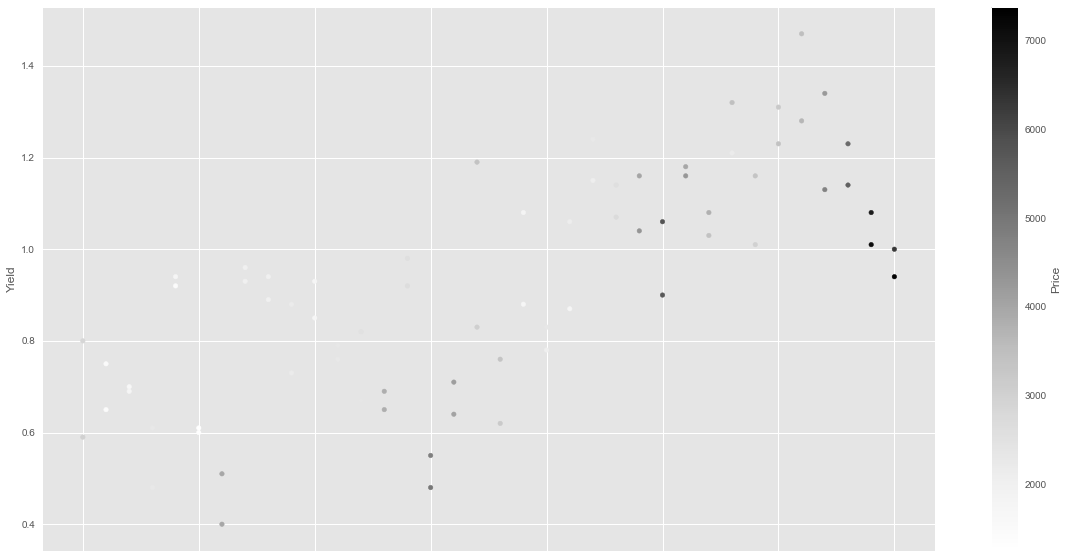

In [124]:
dataset.plot(kind='scatter', x='Year', y='Yield', c='Price',figsize=[20,10])
plt.show()

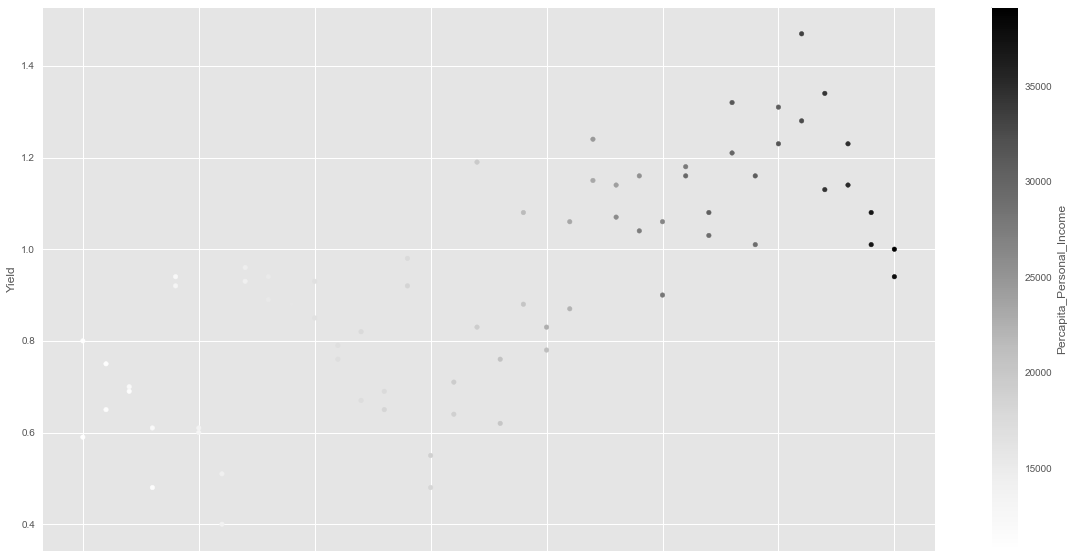

In [125]:
dataset.plot(kind='scatter', x='Year', y='Yield', c='Percapita_Personal_Income',figsize=[20,10])
plt.show()

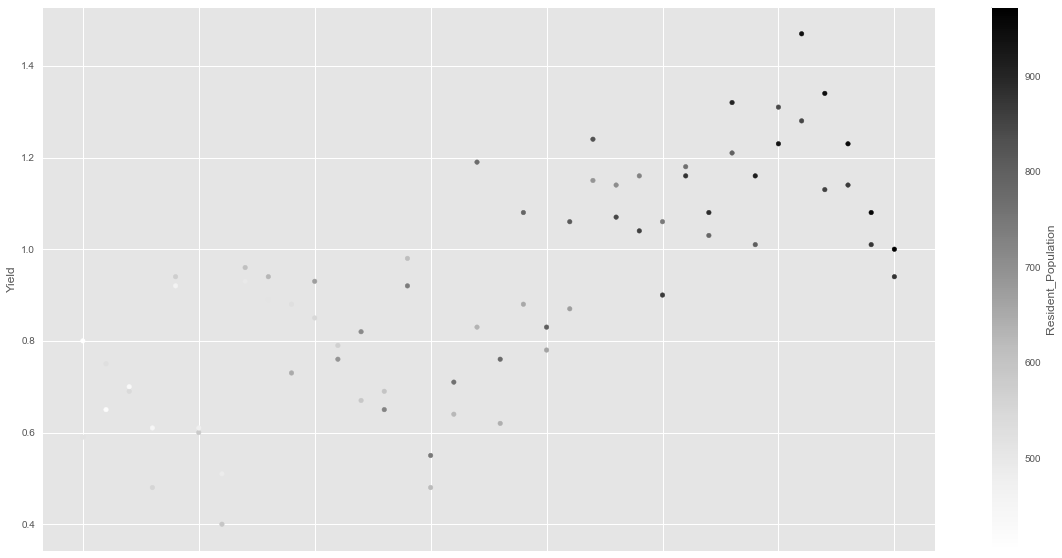

In [126]:
dataset.plot(kind='scatter', x='Year', y='Yield', c='Resident_Population',figsize=[20,10])
plt.show()

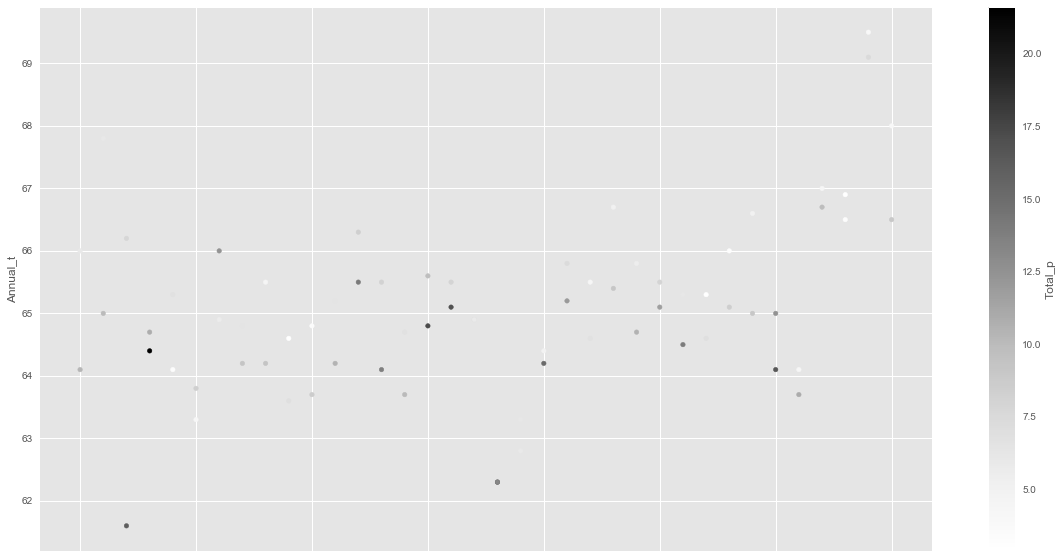

In [127]:
dataset.plot(kind='scatter', x='Year', y='Annual_t', c='Total_p',figsize=[20,10])
plt.style.use('ggplot')
plt.show()

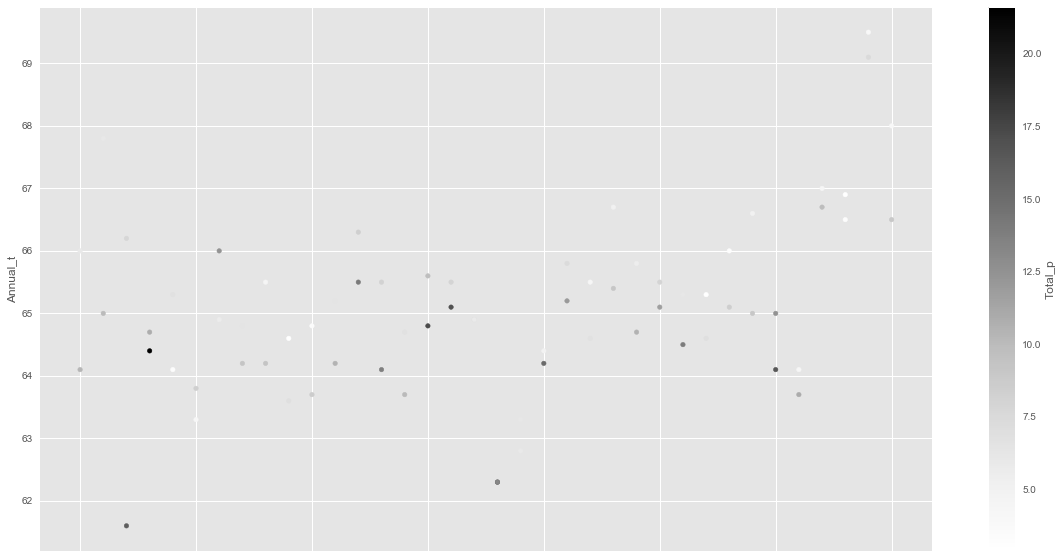

In [128]:
dataset.plot(kind='scatter', x='Year', y='Annual_t', c='Total_p',figsize=[20,10])
plt.style.use('ggplot')
plt.show()

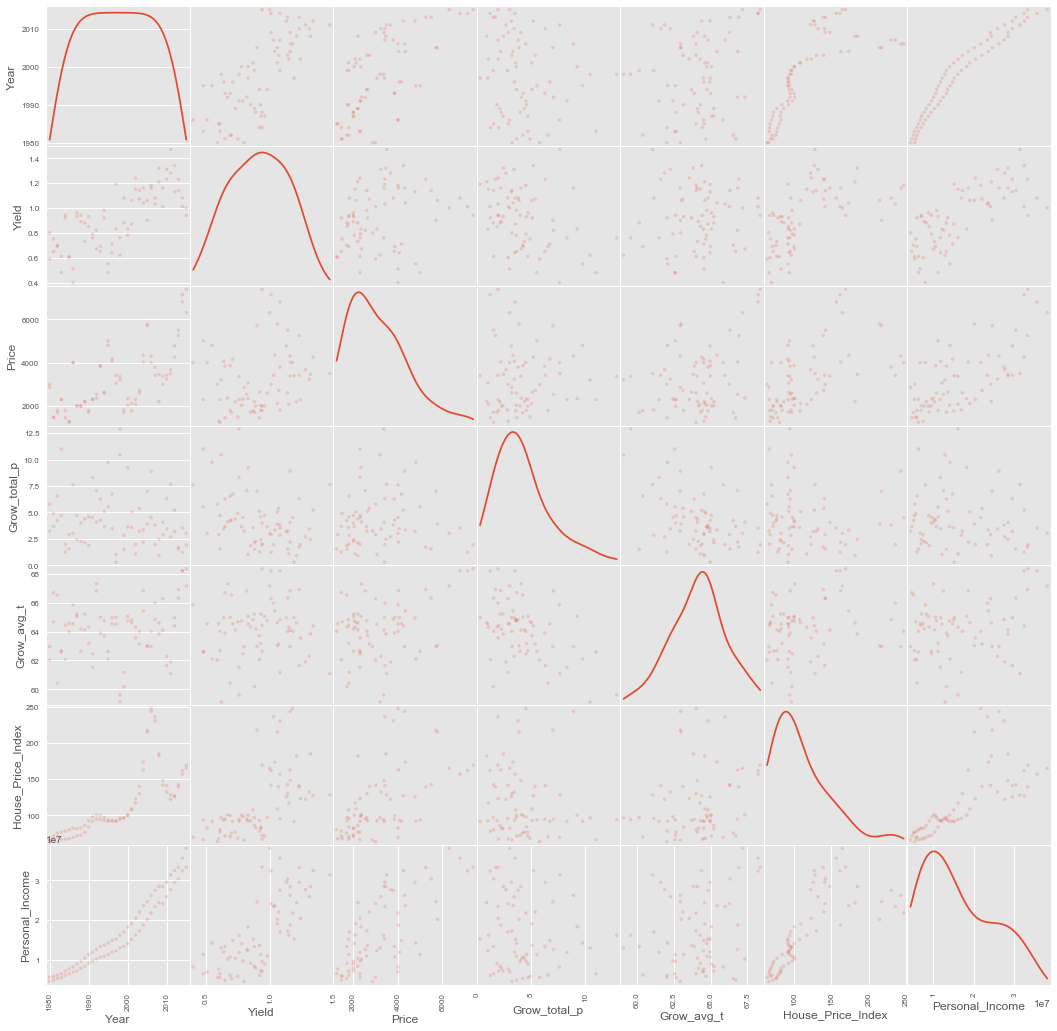

In [129]:
from pandas.tools.plotting import scatter_matrix
areas = dataset[['Year','Yield','Price','Grow_total_p','Grow_avg_t','House_Price_Index','Personal_Income']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

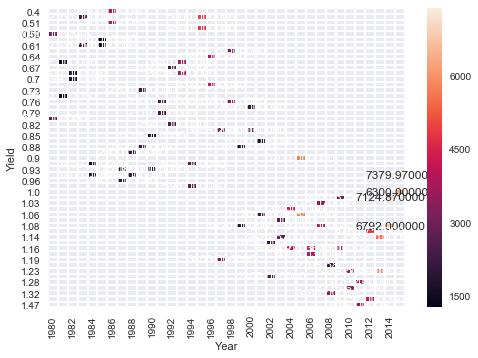

In [130]:
sns.set()


data1 = dataset.pivot('Yield', 'Year', 'Price')

# Draw a heatmap with the numeric values in each cell
sns.heatmap(data1, annot=True, fmt='f', linewidths=1)
plt.show()

In [131]:
import pickle 

with open('forest-riders.pkl', 'wb') as f:
    pickle.dump(model, f)

In [132]:
with open('forest-riders.pkl', 'rb') as f:
    model = pickle.load(f)

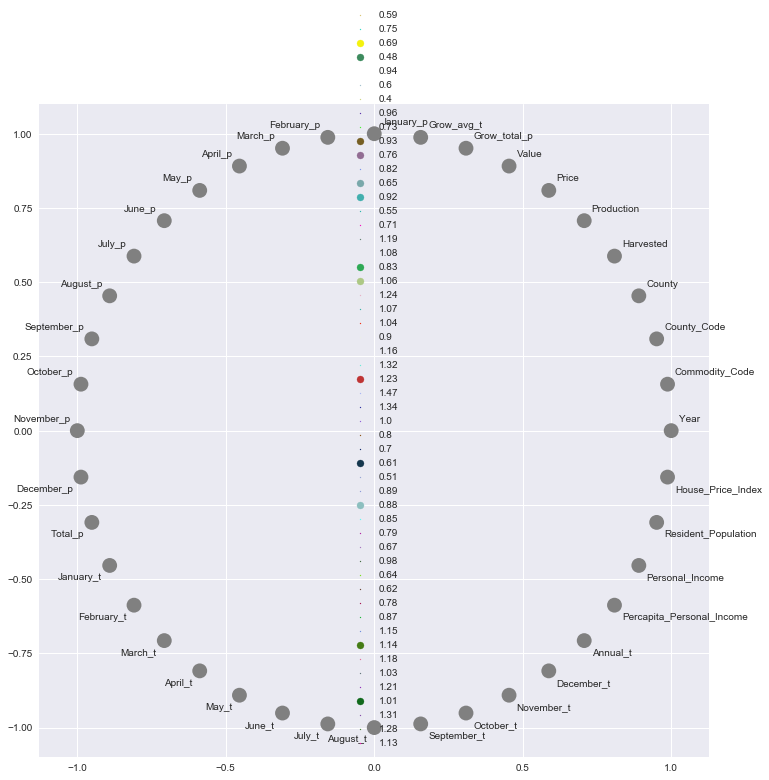

In [133]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(dataset, 'Yield')
plt.show()

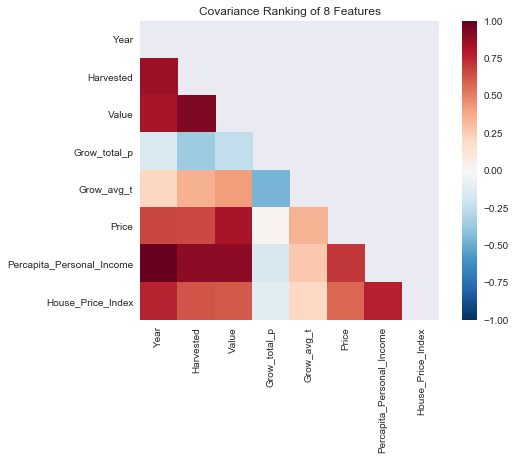

In [134]:
from yellowbrick.features.rankd import Rank2D 
# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data

In [136]:
features = ['Year','Harvested','Value','Grow_total_p','Grow_avg_t','Price']
target = 'Yield'

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

X = (dataset[features])
y = (dataset[target])

# L2 and L1 Regularization 
#alphas = np.logspace(-10, 0, 200)

X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.2,random_state=1)


model = RandomForestRegressor(n_estimators = 10, random_state = 0,max_depth=3) 
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)
print("r2={:0.3f} MSE={:0.3f}".format(r2,me))



r2=0.726 MSE=0.016


In [137]:
from sklearn import tree
from IPython.core.display import Image
from pandas.compat import StringIO

import pydotplus

# Visualize tree
dot_data = StringIO()
tree.export_graphviz(model.estimators_[5], out_file='tree.dot')

ModuleNotFoundError: No module named 'pydotplus'